# Project Code: Current and Power Characteristics of a Model Photovoltaic (PV) System using Remotely Sensed Meteorological Data


Authors: Francis Murillo Emralino, Paul Allen M. Gonzales

Subject: PHY638M - Computational Methods of Physics

Date Started: April 22, 2021

Dates of  Update: (2021) April 22, 26, 28 / May 3, 4, 6, 7, 9, 12, 20, 23

# I. Project Description

This machine project aims to:
1.	generate a code that will gather meteorological data from NASA satellite and use it to estimate the power output of a model multi-crystalline silicon PV module in a specific time and location;

2.	plot the output of power vs time of a model multi-crystalline silicon PV module in a specific time and location;

3.	describe the current and power characteristics of a model multi-crystalline silicon PV module using remotely sensed meteorological data as input weather parameters in terms of current and power curves; and

4.	compare the power curves for November 2020 input weather parameters representing wet season and for March 2021 input weather parameters representing dry season.


# II. Code Breakdown (with descriptions)

This part discusses each part of the machine project program. The executable code is found in Part III.

# A. Data Download from NASA POWER Project Database

The source of the input meteorological data is the NASA Prediction of Worldwide Energy Resources (POWER) Project database through its website. This code snippet requires the user to input the URL, in this case the one generated by NASA specfiic to the location, period, and required data.

In [ ]:
#url NASA website: https://power.larc.nasa.gov/data-access-viewer/
#for november 2020: https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20201101_20201130_014d56N_120d99E_dc026933.json
#for march 2021:https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20210301_20210331_014d56N_120d99E_20f76210.json
#urls generated: May 23, 2021

# Read url from NASA website
import urllib.request, json 
import pandas as pd
link = input('Enter URL:')
with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())
table=pd.DataFrame(pd.DataFrame.from_dict(pd.DataFrame.from_dict(data, orient='index').T.features[0]).properties['parameter'])


# B. Value Assignment for Physical Constants and Input Parameters

The constant values and other inputs parameters needed are set here. Most of the value are from the JAP6-72/305-325/4BB Multicrystalline Silicon Module Data Sheet. The input value for reference solar irradiance is the solar irradiance at standard test conditions (STC).

In [ ]:
#Insert constant values and values from data sheet

q = 1.602*10**(-19)                       #electron charge in C
K = 1.380*10**(-23)                       #Boltzmann's constant in J/k
Eg = 1.1                                  #Forbidden energy band gap for silicon in eV
Ki = 0.005254                             #Temperature coefficient of Isc cell short circuit current in A/Cdeg (Table 2 pg.5)
Isc = 9.06                                #Short-circuit current in A (Table 2 pg.5)
Gref = 1000                               #Solar Irradiance at STC [W/m2] (Table 2 pg.5)
G = 800                                   #Solar Irradiance at 20 degC [W/m2] (from specs. NOTC) [#Can be solved using interpolation where G1 = 1000, G2 = 800, T1 = 25, T2 = 20]
                                          #G = 40*df['TS']
Voc = 46.22                               #Open circuit voltage in V (Table 2 pg.5)
Ns = 72                                   #Total series cells (Table 2 pg.5)
A = 1.3                                   #Ideality factor of diode (Table 2 pg.5)


# C. Current Computations

In [ ]:
#Iph: Equation of Photocurrent of a solar PV cell generated due to solar irradiation [A] 

#Import library

%matplotlib inline                                    
from matplotlib import pyplot as plt
from numpy import *
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure  

#For To(TS) and Tr (T2M)


Tr = table['T2M'] + 273                                  #Get the temperature from csv file in your Google drive (T2M is Temperature at 2 Meters (C)) then convert to kelvin
To = table['TS'] + 273                                   #Get the temperature from csv file in your Google drive (TS is Earth Skin Temperature (C)) then convert to kelvin

a = (To - Tr)                                         #solve for the difference of real-time temperature and reference temperature

Iph = (Isc + Ki*(a)) * (G/Gref)                       #solve for Photocurrent of a solar PV cell generated due to solar irradiation [A] 


#Irs: equation of Reverse Saturation Current

y = (q*Voc)/(Ns*K*A*To)                               # setting x and y as variable to simplify the equation of Irs [*]
x = np.exp(y)

Irs = (Isc)/(x - 1.0)                                 # input the values of x [*]


#Is: equation of Saturation Current

b = (q*Eg/(A*K) * (1/Tr - 1/To))                      # setting b and c as variable to simplify the equation of Is [*] 
c = np.exp(b) 
Is = (Irs * (To/Tr)**3) * c                           # input the values of c [*]

# Id: equation of Shockley's diode current

Id = Is * (x - 1)                                     # Inserting Is and variable x to solve Id

# I: equation of ideal solar cell with a current source (Iph) parallel to the diode
I = Id - Iph                                         # [*]
p = I*Voc                                            #Power generated using Electrical parameters of JAP6-72-320/4BB solar PV module.



# D. Plot Generation

In [ ]:
# Set up the graph
# Define the graph depending on the link (november 2020 or march 2021)
if link == 'https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20201101_20201130_014d56N_120d99E_614efdae.json':                             
  plt.title('Solar PV Module Output for DLSU Manila November 2020')
  plt.plot(p,color='red')
  plt.xlabel('November 2020 (time in days)')
else:
  plt.title('Solar PV Module Output for DLSU Manila March 2021')
  plt.plot(p,color='red')
  plt.xlabel('March 2021 (time in days)')

plt.ylabel('Power (Watts)')
plt.grid()

============================================================================================

# III. Raw code for Running (input data: November 2020 and March 2021)

Enter URL:https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20210301_20210331_014d56N_120d99E_b52085a1.json


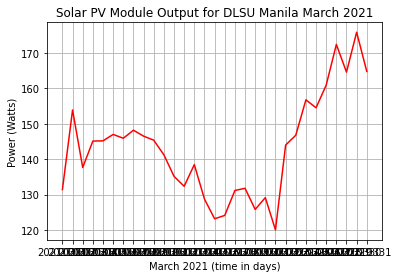

In [4]:
#url NASA website: https://power.larc.nasa.gov/data-access-viewer/
#coordinates: 14.5648, 120.9932
#for november 2020: https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20201101_20201130_014d56N_120d99E_778b31c1.json
#for march 2021:https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20210301_20210331_014d56N_120d99E_b52085a1.json
#Note: the URL for specific date may vary due to NASA security, to generate new URL please access the NASA website
#urls generated: May 23, 2021

# Read url from NASA website
import urllib.request, json 
import pandas as pd
link = input('Enter URL:')
with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())
table=pd.DataFrame(pd.DataFrame.from_dict(pd.DataFrame.from_dict(data, orient='index').T.features[0]).properties['parameter'])

#Insert constant values and values from data sheet

q = 1.602*10**(-19)                       #electron charge in C
K = 1.380*10**(-23)                       #Boltzmann's constant in J/k
Eg = 1.1                                  #Forbidden energy band gap for silicon in eV
Ki = 0.005254                             #Temperature coefficient of Isc cell short circuit current in A/Cdeg (Table 2 pg.5)
Isc = 9.06                                #Short-circuit current in A (Table 2 pg.5)
Gref = 1000                               #Solar Irradiance at STC [W/m2] (Table 2 pg.5)
G = 800                                   #Solar Irradiance at 20 degC [W/m2] (from specs. NOTC) [#Can be solved using interpolation where G1 = 1000, G2 = 800, T1 = 25, T2 = 20]
                                          #G = 40*df['TS']
Voc = 46.22                               #Open circuit voltage in V (Table 2 pg.5)
Ns = 72                                   #Total series cells (Table 2 pg.5)
A = 1.3                                   #Ideality factor of diode (Table 2 pg.5)

#Iph: Equation of Photocurrent of a solar PV cell generated due to solar irradiation [A] 

#Import library

%matplotlib inline                                    
from matplotlib import pyplot as plt
from numpy import *
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure  

#For To(TS) and Tr (T2M)


Tr = table['T2M'] + 273                                 #Get the temperature from csv file in your Google drive (T2M is Temperature at 2 Meters (C)) then convert to kelvin
To = table['TS'] + 273                                  #Get the temperature from csv file in your Google drive (TS is Earth Skin Temperature (C)) then convert to kelvin

a = (To - Tr)                                         #solve for the difference of real-time temperature and reference temperature

Iph = (Isc + Ki*(a)) * (G/Gref)                       #solve for Photocurrent of a solar PV cell generated due to solar irradiation [A] 


#Irs: equation of Reverse Saturation Current

y = (q*Voc)/(Ns*K*A*To)                               # setting x and y as variable to simplify the equation of Irs [*]
x = np.exp(y)

Irs = (Isc)/(x - 1.0)                                 # input the values of x [*]


#Is: equation of Saturation Current

b = (q*Eg/(A*K) * (1/Tr - 1/To))                      # setting b and c as variable to simplify the equation of Is [*] 
c = np.exp(b) 
Is = (Irs * (To/Tr)**3) * c                           # input the values of c [*]

# Id: equation of Shockley's diode current

Id = Is * (x - 1)                                     # Inserting Is and variable x to solve Id

# I: equation of ideal solar cell with a current source (Iph) parallel to the diode
I = Id - Iph                                         # [*]
p = I*Voc                                            #Power generated using Electrical parameters of JAP6-72-320/4BB solar PV module.


# Set up the graph
# Define the graph depending on the link (november 2020 or march 2021)
if link == 'https://power.larc.nasa.gov/downloads/POWER_SinglePoint_Daily_20201101_20201130_014d56N_120d99E_778b31c1.json':                             
  plt.title('Solar PV Module Output for DLSU Manila November 2020')
  plt.plot(p,color='red')
  plt.xlabel('November 2020 (time in days)')
else:
  plt.title('Solar PV Module Output for DLSU Manila March 2021')
  plt.plot(p,color='red')
  plt.xlabel('March 2021 (time in days)')

plt.ylabel('Power (Watts)')
plt.grid()
